In [213]:
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['axes.linewidth'] = 1.0

# Superconducting circuit protected by two-Cooper-pair tunneling

Smith, W.C., Kou, A., Xiao, X. et al. npj Quantum Inf 6, 8 (2020). https://doi.org/10.1038/s41534-019-0231-2

## Have a feeling about what's going on

The potential energy of a $\cos2\varphi$ element is 

\begin{align}
+E_J\cos2\varphi = + \frac{E_J}{2} \sum_{N=-\infty}^{\infty}|N\rangle\langle N+2| + |N+2\rangle\langle N|,
\end{align}

where $E_J$ is the effective tunneling energy of the process. This expression follows the from conjugation relation, $[\varphi, N]=i$, where $N$ is the number of Cooper pairs that have tunneled. The invariance of the potential under translations in $\varphi$ by multiples of $\pi$ implies that half-fluxons are able to traverse the element. Note the + plus sign in front of it.

Now. The total Hamiltonian reads

\begin{align}
H &= 4E_C(N-N_g)^2 - E_J\cos2\varphi,\\
&=4E_C\sum_{N=-\infty}^\infty(N-N_g)^2|N\rangle\langle N| + \frac{E_J}{2} \sum_{N=-\infty}^{\infty} |N\rangle\langle N+2| + |N+2\rangle\langle N|,
\end{align}

where $E_C$ is the charging energy and $N_g$ is the offset charge. 

Since the circuit element only allows *pairs of Cooper pairs to tunnel, the parity of the number of Cooper pairs that have tunneled is preserved under the action of the Hamiltonian. This leads to the ground state to be nearly-doubly degenerate. 

### The Hamiltonian

In [61]:
def hamiltonian(Ec, Ej, N, ng):
    '''
        Hamiltonian for the cos2phi qubit
    '''
    m = np.diag(4 * Ec * (np.arange(-N, N + 1) - ng) ** 2) + 0.5 * Ej * (
        np.diag(np.ones(2 * N - 1), 2) + np.diag(np.ones(2 * N - 1), -2)
    )
    return qt.Qobj(m)

We initialize here the Hamiltonian of a $\cos2\varphi$ qubit. We truncate the Hilbert space dimension to 4. The $E_{2J}/E_C$ ratio is 20. Without loss of generality, the circuit is operated at the charge-offset point $n_g=0$.

In [62]:
N0 = 20
H_2p = hamiltonian(Ec=1, Ej=30, N=N0, ng=0)

eig_val, eig_state = H_2p.eigenstates()

In [63]:
len(eig_val), 2*N0+1

(41, 41)

In [64]:
H_2p

Quantum object: dims=[[41], [41]], shape=(41, 41), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1600.    0.   15. ...    0.    0.    0.]
 [   0. 1444.    0. ...    0.    0.    0.]
 [  15.    0. 1296. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1296.    0.   15.]
 [   0.    0.    0. ...    0. 1444.    0.]
 [   0.    0.    0. ...   15.    0. 1600.]]

### Visualizing the number ladder

$|g\rangle$ and $|e\rangle$ are the two nearly degenerate ground state of the Hamiltonian. They are supported on *only* even and odd number states, respectively.

In [65]:
g = eig_state[0]

g

Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
Qobj data =
[[ 1.10066658e-14]
 [ 0.00000000e+00]
 [-1.18552287e-12]
 [ 0.00000000e+00]
 [ 1.03654515e-10]
 [ 0.00000000e+00]
 [-7.18306086e-09]
 [ 0.00000000e+00]
 [ 3.82821990e-07]
 [ 0.00000000e+00]
 [-1.50924148e-05]
 [ 0.00000000e+00]
 [ 4.17820997e-04]
 [ 0.00000000e+00]
 [-7.55145214e-03]
 [ 0.00000000e+00]
 [ 7.99513006e-02]
 [ 0.00000000e+00]
 [-4.16952891e-01]
 [ 0.00000000e+00]
 [ 7.99626009e-01]
 [ 0.00000000e+00]
 [-4.16952891e-01]
 [ 0.00000000e+00]
 [ 7.99513006e-02]
 [ 0.00000000e+00]
 [-7.55145214e-03]
 [ 0.00000000e+00]
 [ 4.17820997e-04]
 [ 0.00000000e+00]
 [-1.50924148e-05]
 [ 0.00000000e+00]
 [ 3.82821990e-07]
 [ 0.00000000e+00]
 [-7.18306086e-09]
 [ 0.00000000e+00]
 [ 1.03654515e-10]
 [ 0.00000000e+00]
 [-1.18552287e-12]
 [ 0.00000000e+00]
 [ 1.10066658e-14]]

In [66]:
e = eig_state[1]

e

Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00]
 [ 1.18641567e-13]
 [ 0.00000000e+00]
 [-1.15441268e-11]
 [ 0.00000000e+00]
 [ 9.01507946e-10]
 [ 0.00000000e+00]
 [-5.50128193e-08]
 [ 0.00000000e+00]
 [ 2.53533155e-06]
 [ 0.00000000e+00]
 [-8.43780764e-05]
 [ 0.00000000e+00]
 [ 1.90743974e-03]
 [ 0.00000000e+00]
 [-2.68154489e-02]
 [ 0.00000000e+00]
 [ 2.04640778e-01]
 [ 0.00000000e+00]
 [-6.76313121e-01]
 [ 0.00000000e+00]
 [ 6.76313121e-01]
 [ 0.00000000e+00]
 [-2.04640778e-01]
 [ 0.00000000e+00]
 [ 2.68154489e-02]
 [ 0.00000000e+00]
 [-1.90743974e-03]
 [ 0.00000000e+00]
 [ 8.43780764e-05]
 [ 0.00000000e+00]
 [-2.53533155e-06]
 [ 0.00000000e+00]
 [ 5.50128193e-08]
 [ 0.00000000e+00]
 [-9.01507946e-10]
 [ 0.00000000e+00]
 [ 1.15441328e-11]
 [ 0.00000000e+00]
 [-1.18641586e-13]
 [ 0.00000000e+00]]

We choose them to be the two logical states of the qubit. To visualize how these two are supported on different parity subspaces, let's plot the coefficients.

In [67]:
def extract_coefficients(eig_state, N0, state_idx):
    '''
        Extract the coefficients (float)
    '''
    return np.array([np.real(eig_state[state_idx][i][0]) for i in range(2 * N0 + 1)])

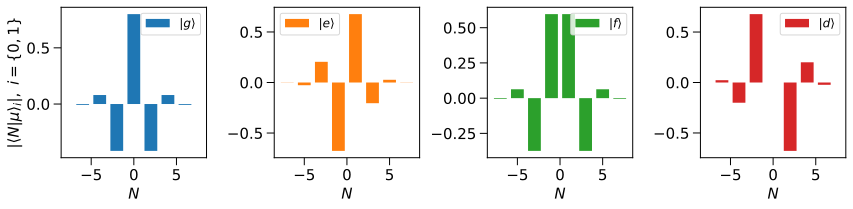

In [69]:
# For a truncated Hilbert space of dimension 2N_0+1, the number of charge on a superconducting island goes from -N_0 to N_0
range_N = np.arange(-N0, N0+1)

coefficients = [
    extract_coefficients(eig_state, N0, i) for i in range(4)
]

shrink = 13
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
labels = [r'$|g\rangle$', r'$|e\rangle$', r'$|f\rangle$', r'$|d\rangle$']

fig, axes = plt.subplots(ncols=4, figsize=(12, 3))

for ax, coef, color, label in zip(axes, coefficients, colors, labels):
    ax.bar(range_N[shrink:-shrink], coef[shrink:-shrink], color=color, label=label, width=1.5)
    ax.set_xlabel(r'$N$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='out', which='both')
    ax.tick_params(axis='both', which='major', length=7.5, width=1.0)
    ax.legend(fontsize=12)

axes[0].set_ylabel(r'$|\langle N|\mu\rangle_i|,\ i=\{0,1\}$', fontsize=15)

fig.tight_layout()

### Nearly degenerate ground states

In [70]:
eig_val[0], eig_val[1]

(np.float64(-15.643046348321143), np.float64(-15.538743340734907))

Indeed, they are very close to each other. Let us actually look at the structure of the first 6 eigenenergies (adjust `ylim` to see others).

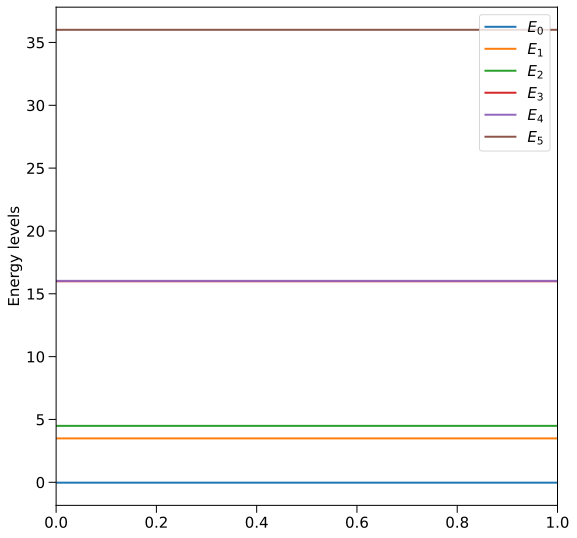

In [129]:
fig, ax = plt.subplots(figsize=(9, 9))
for i in range(6):
    ax.axhline(eig_val[i], color=colors[i], lw=2.0, label=rf'$E_{i}$')

ax.set_ylabel('Energy levels', fontsize=15)
ax.tick_params(axis='both', labelsize=15, direction='out', which='both', length=7.5, width=1.0)
ax.legend(fontsize=15)
# plt.ylim([-10, -])

### Energy dispersion w.r.t to charge-offset

In [113]:
Ejs = [1, 5, 10, 20]
ngs = np.linspace(0, 1, 1000)
eig = np.zeros((len(Ejs), len(ngs), 6))

for i, Ej in enumerate(Ejs):
    for k, ng in enumerate(ngs):
        H2p = hamiltonian(Ec=1, Ej=Ej, N=N0, ng=ng)
        vals, _ = H2p.eigenstates()
        eig[i, k, :] = vals[:6]
        
eig = eig.transpose(0, 2, 1)

C:\Users\ngdnh\AppData\Local\Temp\ipykernel_5712\150784428.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


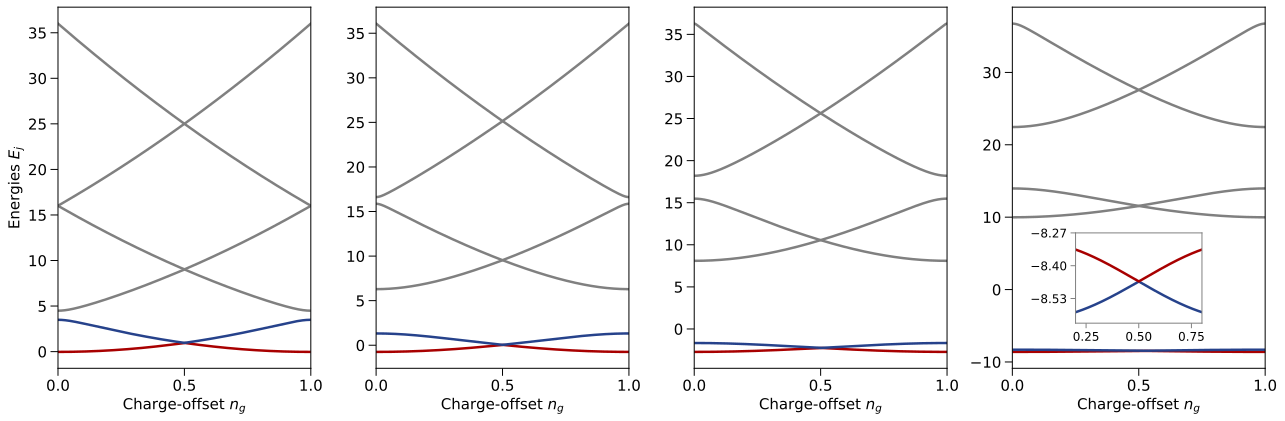

In [186]:
fig, axes = plt.subplots(ncols=4, figsize=(18, 6))

for i in range(4):
    axes[i].plot(ngs,eig[i][0], color='#a80000',linewidth=2.5)
    axes[i].plot(ngs,eig[i][1], color='#26428b',linewidth=2.5)
    for j in range(2, 6):
        axes[i].plot(ngs,eig[i][j], color='gray', linewidth=2.5)
    axes[i].set_xlim(min(ngs), max(ngs))
    axes[i].tick_params(axis='both', labelsize=15, direction='out', which='both', length=7.5, width=1.0)
    axes[i].set_xticks([0, 0.5, 1.0])
    axes[i].set_xlabel(r'Charge-offset $n_g$', fontsize=15)

axes[0].set_ylabel(r'Energies $E_j$',fontsize=15)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
parent_ax = axes[3]
inset_ax = inset_axes(
    parent_ax,
    width="50%",    
    height="25%", 
    loc="center",  
    bbox_to_anchor=(0, -0.25, 1, 1),
    bbox_transform=parent_ax.transAxes
)
inset_ax.plot(ngs, eig[-1][0], linewidth=2.5, color='#26428b')
inset_ax.plot(ngs, eig[-1][1], linewidth=2.5, color='#a80000')
inset_ax.set_xlim(0.2, 0.8)
inset_ax.tick_params(axis='both', labelsize=12, direction='out', length=5, width=1, color='gray')
inset_ax.set_yticks([-8.53, -8.40, -8.27]) 

for spine in inset_ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

fig.tight_layout()
# fig.savefig('./energy_spectrum.png', dpi=1000, transparent=True)

In the Smith2020 paper, the states $|g\rangle$ and $|e\rangle$ are also called $|+\rangle$ and $|-\rangle$. They do not overlap in charge space (as seen above) and equivalently will have opposite periodicity in phase space (see below). This unique property predicts that for any sufficiently local operator $\mathcal{O}$, we have $\langle -|\mathcal{O}|+\rangle$. 

*We're gonna see later what these $\mathcal{O}$ operators are.

Furthermore, the states $|\circlearrowleft/\circlearrowright\rangle=\frac{1}{\sqrt{2}}(|+\rangle\pm|-\rangle)$ are, respectively, localized near $-\pi/2$ and $\pi/2$. Let's now elucidate these concepts.

### Visualizing the states in the phase basis $|\varphi\rangle$

What we have from the diagonalization is

\begin{align}
|\psi\rangle = \sum_{N} \langle N|\psi\rangle |N\rangle.
\end{align}

Because the system has one DoF being continuous (superconducting phase) and one being discrete (number of Cooper pairs on a superconducting island), it is a rotor. The commutation relation is $[\varphi, N]=i$. We have the following identity,

\begin{align}
\langle \varphi | N \rangle = e^{iN\varphi}.
\end{align}

Now, the wavefunction of interest is 
\begin{align}
\langle \varphi | \psi \rangle &= \langle \varphi | \left(\sum_{N=-N_0}^{N_0} \langle N|\psi\rangle |N\rangle\right),\\
&=\sum_{N=-N_0}^{N_0} \langle N|\psi\rangle \langle \varphi | N\rangle,\\
&=\frac{1}{\sqrt{2\pi}}\sum_{N,N'}e^{i\varphi N'}\langle N' |N\rangle \langle N|\psi\rangle,\\
&=\frac{1}{\sqrt{2\pi}}\sum_{N}e^{i\varphi N}\langle N|\psi\rangle.
\end{align}

In [187]:
def compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts):
    return np.array([
        (1 / math.sqrt(2 * np.pi)) * np.sum(
            coef * np.exp(1j * phi_basis_labels[k] * range_N)
        ) for k in range(phi_grid_pts)
    ])

In [188]:
phi_grid_pts = 100
phi_basis_labels = np.linspace(-np.pi, np.pi, phi_grid_pts)

phi_wavefunc_amplitudes = [
    np.empty(phi_grid_pts, dtype=np.complex128) for _ in range(len(coefficients))
]

for i, coef in enumerate(coefficients):
    phi_wavefunc_amplitudes[i] = compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts)

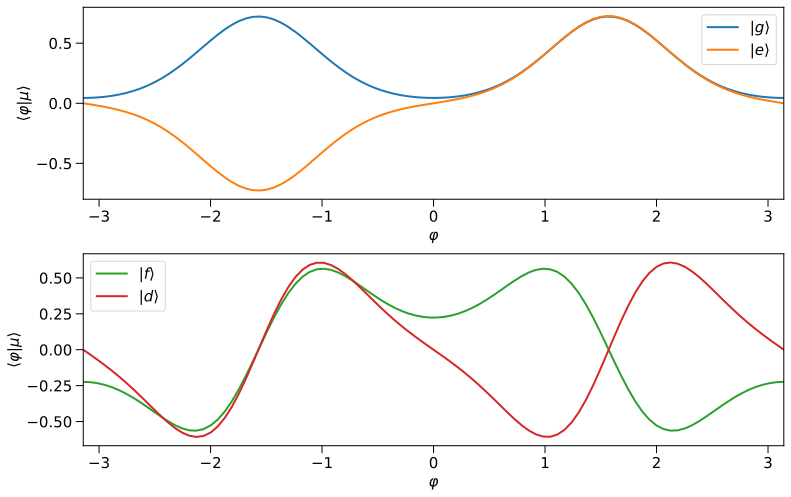

In [216]:
fig, axes = plt.subplots(nrows=2, figsize=(11, 7))

axes[0].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes[0]), label=r'$|g\rangle$', color=colors[0], linewidth=2.0)
axes[0].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes[1]), label=r'$|e\rangle$', color=colors[1], linewidth=2.0)

axes[1].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes[2]), label=r'$|f\rangle$', color=colors[2], linewidth=2.0)
axes[1].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes[3]), label=r'$|d\rangle$', color=colors[3], linewidth=2.0)

for ax in axes:
    ax.set_xlim(min(phi_basis_labels), max(phi_basis_labels))
    ax.set_xlabel(r'$\varphi$', fontsize=15)
    ax.set_ylabel(r'$\langle\varphi|\mu\rangle$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='out', which='both', length=7.5, width=1.0)
    ax.legend(fontsize=15)

fig.tight_layout()

We see that in this case, the wavefunctions are localized near $\phi=-\pi/2,\pi/2$, resulting in a nearly degenerate harmonic level arrangement. We now look at the two specific states that we mentioned above, $|\circlearrowright/\circlearrowleft\rangle=\frac{1}{\sqrt{2}}(|+\rangle\pm|-\rangle)$.

In [196]:
ca_countercw = (1/np.sqrt(2))*(phi_wavefunc_amplitudes[0]+1j*phi_wavefunc_amplitudes[1])
ca_counterctw = (1/np.sqrt(2))*(phi_wavefunc_amplitudes[0]-1j*phi_wavefunc_amplitudes[1])

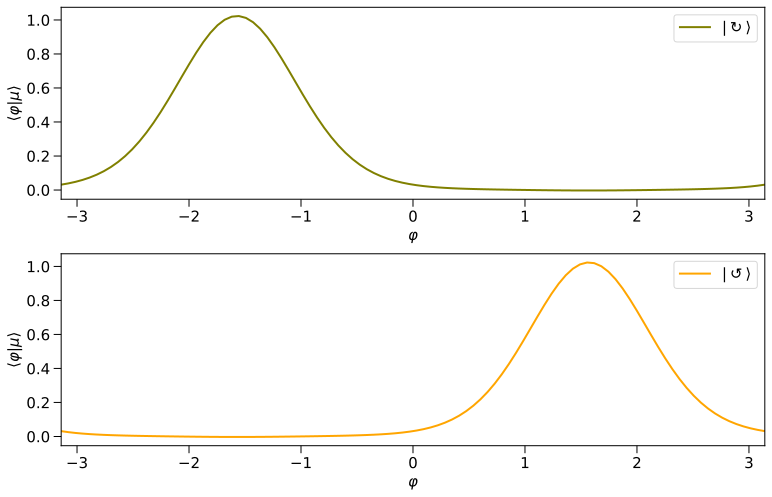

In [217]:
fig, axes = plt.subplots(nrows=2, figsize=(11, 7))

axes[0].plot(phi_basis_labels, np.real(ca_countercw), label=r'$|\circlearrowright\rangle$', color='olive', linewidth=2.0)
axes[1].plot(phi_basis_labels, np.real(ca_counterctw), label=r'$|\circlearrowleft\rangle$', color='orange', linewidth=2.0)

for ax in axes:
    ax.set_xlim(min(phi_basis_labels), max(phi_basis_labels))
    ax.set_xlabel(r'$\varphi$', fontsize=15)
    ax.set_ylabel(r'$\langle\varphi|\mu\rangle$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='out', which='both', length=7.5, width=1.0)
    ax.legend(fontsize=15)

fig.tight_layout()

*Very cool, huh! These two states have suppresed overlap in phase space for large $E_J/E_C$. We could check this later if time permits. Right now, note that the $E_J/E_C$ value is 20.

### Check for the convergence of the Hilbert space

List of dimensions that we're gonna check

In [201]:
n_dimensions = [6, 7, 8, 9, 10, 11]

n_dimensions

[6, 7, 8, 9, 10, 11]

In [202]:
def qobj2np(state):
    ''' 
        Convert a Qobj state to a numpy array.
        Note: Fock coefficients assumed to be real.
    '''
    dim = state.shape[0]
    arr = []
    for d in range(dim):
        arr.append(np.real(state[d][0]))
    return np.array(arr)

In [203]:
def dilate(state_s, state_l):
    '''
        Dilate a state of dimension s to dimension l
    '''
    ns = state_s.shape[0]
    nl = state_l.shape[0]

    num_zeros = int((nl - ns)/2)

    state_s = qobj2np(state_s)

    dilated_state_s = np.array([0.0] * num_zeros + list(state_s) + [0.0] * num_zeros, dtype=float)
    
    return qt.Qobj(dilated_state_s)

In [204]:
H0 = hamiltonian(Ec=1, Ej=20, N=n_dimensions[0], ng=0)

_, eign_state_d0 = H0.eigenstates()

print(eign_state_d0[-1].shape)

H1 = hamiltonian(Ec=1, Ej=20, N=n_dimensions[1], ng=0)

_, eign_state_d1 = H1.eigenstates()

print(eign_state_d1[-1].shape)

(13, 1)
(15, 1)


In [205]:
def vis_n(state):
    ''' 
        Plot number distribution of a cos2phi state
    '''
    N0 = int((state.shape[0]-1)/2)
    range_N = np.arange(-N0, N0+1)
    coef = qobj2np(state)
    plt.bar(range_N, coef, color='olive')

In [206]:
def calculate_fidelities(n_dimensions, idx_state):
    fidelities = []
    eigprev = None

    for d in n_dimensions:
        if d == n_dimensions[0]:
            Hprev = hamiltonian(Ec=1, Ej=50, N=d, ng=0)
            _, eigprev = Hprev.eigenstates()
            continue

        Hnew = hamiltonian(Ec=1, Ej=50, N=d, ng=0)
        _, eignew = Hnew.eigenstates()

        fidelity = qt.fidelity(dilate(eigprev[idx_state], eignew[idx_state]), eignew[idx_state])
        fidelities.append(min(fidelity, 1.0))
        eigprev = eignew

    return fidelities

In [207]:
fid_list = []

for i in range(6):
    fid_list.append(calculate_fidelities(n_dimensions, idx_state=i))

fid_list = np.array(fid_list)

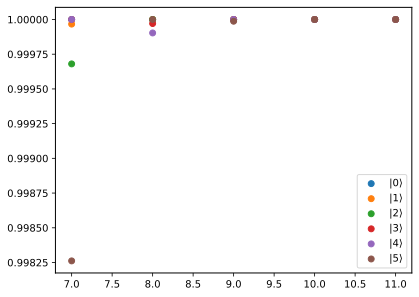

In [208]:
for i in range(6):
    plt.scatter(n_dimensions[1:], fid_list[i], label=rf'$|{i}\rangle$')

plt.legend()

# Software versions

In [215]:
for pkg in [np, matplotlib, qt]:
    print(f"{pkg.__name__}: {pkg.__version__}")

numpy: 2.2.1
matplotlib: 3.10.0
qutip: 5.1.0
